In [1]:
from ssbm import *

/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
test = pd.read_csv('r8-test-stemmed.csv')
train = pd.read_csv('r8-train-stemmed.csv')
docs = [train.text.values.tolist() + test.text.values.tolist()]
labels = [train.intent.values.tolist() + test.intent.values.tolist()]
docs = docs[0]
labels = labels[0]

# SSBM

In [10]:
ssbm = SSBM(docs, n_topics = 8, dimension=100, epoch=80)
predictions, topic_representations, coherence_npmi, coherence_uci, coherence_cv, coherence_div, prediction_clusters = ssbm.train(N=125, p=15, d=6, W=10, c=8, sel_mod=2)

Read 0M words
Number of words:  5351
Number of labels: 0
Progress: 100.0% words/sec/thread:  159234 lr:  0.000000 avg.loss:  1.826162 ETA:   0h 0m 0s% words/sec/thread:  159178 lr:  0.011140 avg.loss:  1.846483 ETA:   0h 0m 4s
/Users/federico.ravenda/anaconda3/envs/fastm/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labs = le.fit_transform(labels)

predictions = prediction_clusters.argmax(1)
print(f'ARI: {adjusted_rand_score(labs, predictions)}')

ARI: 0.4625980313491008


# Topic Propagation

In [14]:
predictions_tp = TopicPropagation(model_name = 'all-miniLM-L6-v2', 
                                  docs = docs, 
                                  n_clusters = 8, 
                                  topic_representations = topic_representations)

Batches: 100%|████████████████████████████████| 223/223 [00:38<00:00,  5.79it/s]


In [16]:
print(f'ARI: {adjusted_rand_score(labs, predictions_tp)}')

ARI: 0.5155448530607692


# Extract the Topic Representations

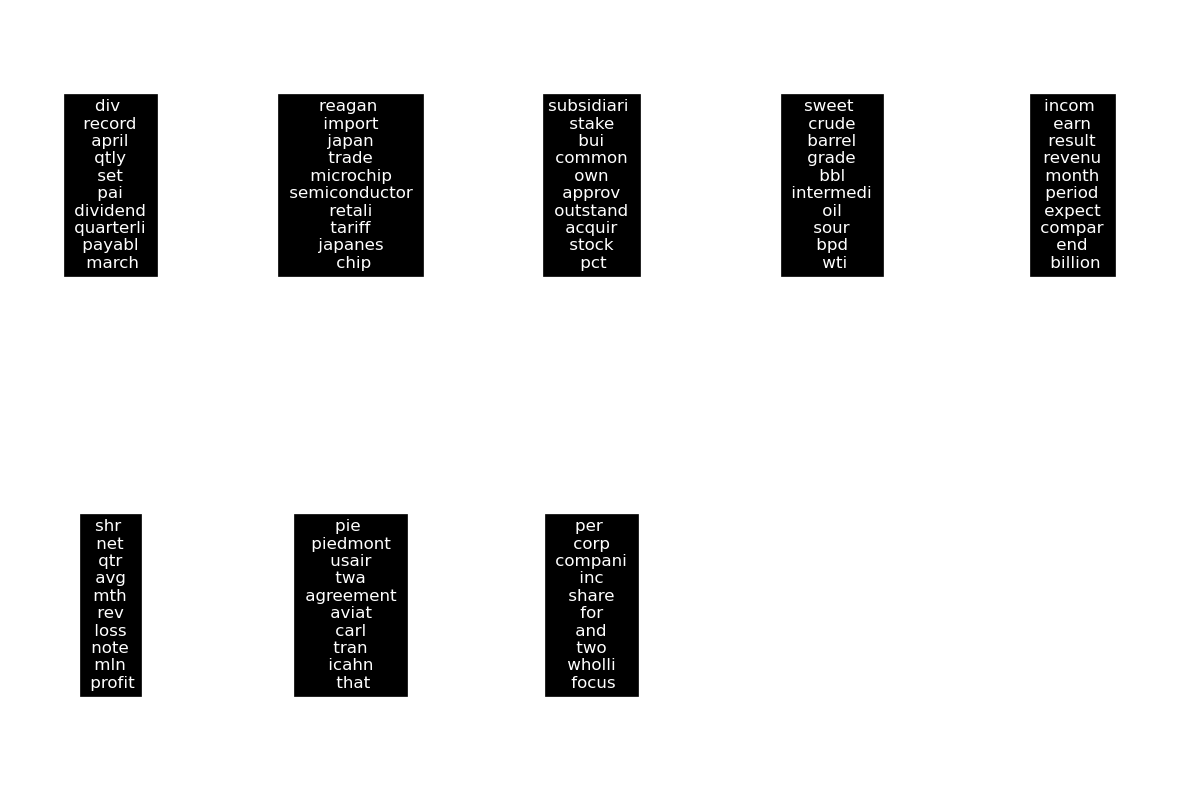

In [17]:
ssbm.plot_topics(topic_representations)